In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Import the warnings module
warnings.filterwarnings('ignore') # Now you can use Warnings.filterwarnings()

In [2]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing(as_frame=True)
data=housing_data.frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
x=data.drop(columns=['MedHouseVal'])
y=data['MedHouseVal']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (16512, 8)
x_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [6]:
# scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
import tensorflow as tf
from tensorflow import keras


In [8]:
tf.random.set_seed(42)

In [9]:
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='tanh'),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [12]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3089 - mean_absolute_error: 0.8094 - val_loss: 0.4241 - val_mean_absolute_error: 0.4750
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3778 - mean_absolute_error: 0.4365 - val_loss: 0.3826 - val_mean_absolute_error: 0.4458
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3430 - mean_absolute_error: 0.4108 - val_loss: 0.3601 - val_mean_absolute_error: 0.4274
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3252 - mean_absolute_error: 0.3971 - val_loss: 0.3462 - val_mean_absolute_error: 0.4144
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3133 - mean_absolute_error: 0.3878 - val_loss: 0.3368 - val_mean_absolute_error: 0.4057
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3043 - mean_absolute_error: 0.3804 - val_loss: 0.3288 - val_mean_absolute_error: 0.3981
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2972 - mean_absolute_error: 0.3

In [13]:
loss,mae=model.evaluate(x_test_scaled,y_test)
print(f"Mean Absolute Error: {mae}")
print(f"Loss: {loss}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2726 - mean_absolute_error: 0.3598
Mean Absolute Error: 0.35738280415534973
Loss: 0.27555450797080994


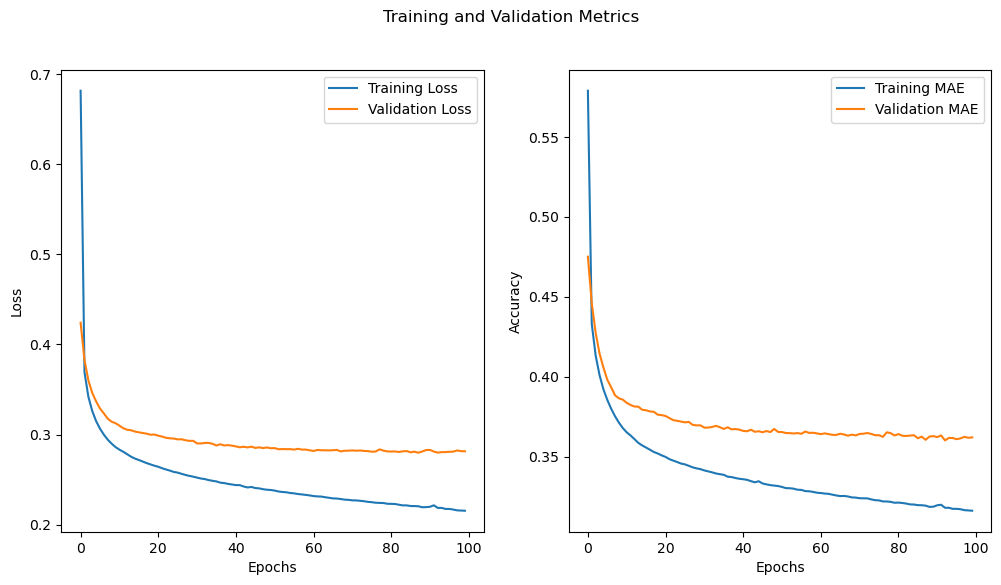

In [14]:
plt.figure(figsize=(12,6))
plt.suptitle('Training and Validation Metrics')
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'],label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'],label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
prediction=model.predict(x_test_scaled)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


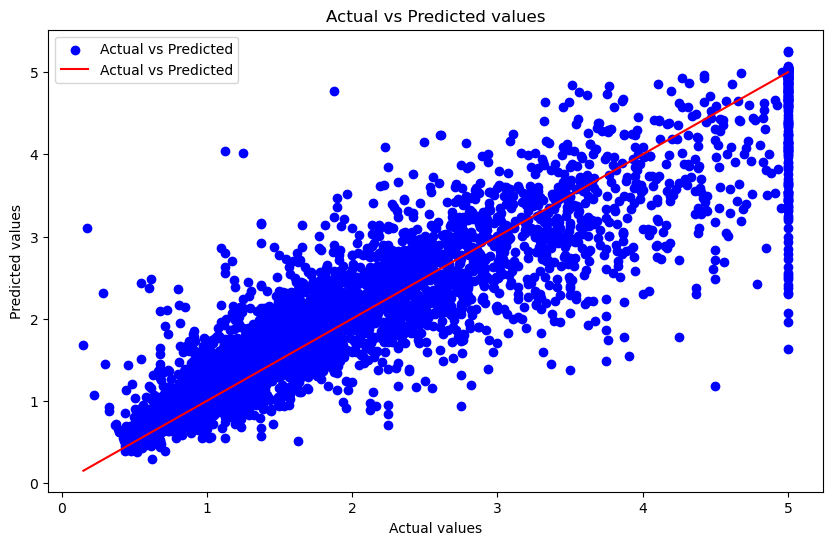

In [16]:
# plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test,prediction,color='blue',label='Actual vs Predicted')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',label='Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()